# Diagram / Figures

This notebook contains diagrams and figures for the paper.

In [3]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sp
import pandas as pd
plt.style.use('ggplot')

In [4]:
from scipy.stats import multivariate_normal

In [16]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'figure.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


In [32]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
            kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k):
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color, hist=False
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True, hist=False
        )
    plt.legend(legends)

### Toy demo

In [33]:
# create 2 kernels
m1 = (3,0)
s1 = [[0.1, 0.6], [0.6, 1]]
data1 = multivariate_normal.rvs(mean=m1, cov=s1, size=1000)

m2 = (0,0)
s2 = [[0.1, 0], [0, 1]]
data2 = multivariate_normal.rvs(mean=m2, cov=s2, size=1000)


In [34]:
df = pd.DataFrame(
    data=np.vstack([data1, data2]),
    columns=['Expression of gene B', 'Expression of gene A'])
df['condition'] = ['Treatment' for i in range(1000)] + ['Control' for i in range(1000)]

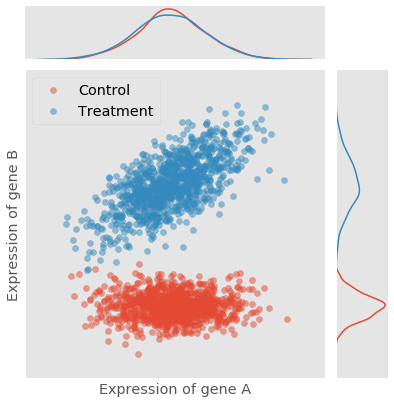

In [35]:
multivariateGrid("Expression of gene A", "Expression of gene B", 'condition', df=df)
plt.xticks([])
plt.yticks([])
plt.savefig('/wynton/group/ye/mincheol/parameter_estimation/figures/de_dv_dc.png')
plt.savefig('/wynton/group/ye/mincheol/parameter_estimation/figures/de_dv_dc.pdf')


### Another one

In [36]:
# create 2 kernels
m1 = (2.5,0)
s1 = [[0.1, 0], [0, 1]]
data1 = multivariate_normal.rvs(mean=m1, cov=s1, size=1000)

m2 = (0,0)
s2 = [[0.1, 0], [0, 5]]
data2 = multivariate_normal.rvs(mean=m2, cov=s2, size=1000)


In [37]:
df = pd.DataFrame(
    data=np.vstack([data1, data2]),
    columns=['Expression of gene B', 'Expression of gene A'])
df['condition'] = ['Treatment' for i in range(1000)] + ['Control' for i in range(1000)]

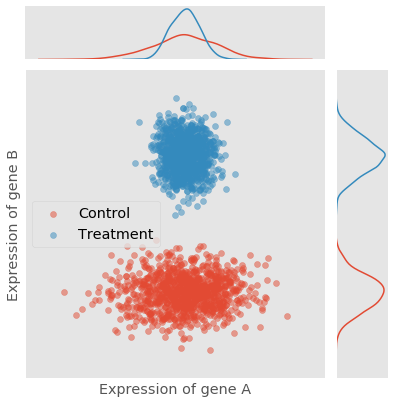

In [38]:
multivariateGrid("Expression of gene A", "Expression of gene B", 'condition', df=df)
plt.xticks([])
plt.yticks([])
plt.savefig('/wynton/group/ye/mincheol/parameter_estimation/figures/no_dc.png')
plt.savefig('/wynton/group/ye/mincheol/parameter_estimation/figures/no_dc.pdf')


### True distributions

In [6]:
num_cells = 1000000

In [7]:
latent_data_1 = stats.gamma.rvs(10, 3, 1, size=num_cells)
latent_data_2 = stats.gamma.rvs(4, 2, 1, size=num_cells)
latent_data_3 = stats.gamma.rvs(2, 1, 1, size=num_cells)

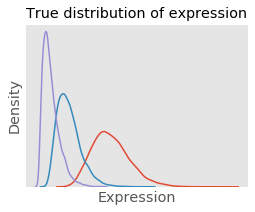

In [22]:
fig = plt.figure(figsize=(4, 3));

sns.distplot(latent_data_1, hist=False)
sns.distplot(latent_data_2, hist=False)
sns.distplot(latent_data_3, hist=False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Expression');
plt.ylabel('Density');
plt.title('True distribution of expression')
plt.savefig('/wynton/group/ye/mincheol/parameter_estimation/figures/three_gene_true.pdf')

### Observed distribution

In [13]:
num_cells = 10000

In [14]:
latent_data_1 = stats.gamma.rvs(10, 3, 1, size=num_cells)
latent_data_2 = stats.gamma.rvs(4, 2, 1, size=num_cells)
latent_data_3 = stats.gamma.rvs(2, 1, 1, size=num_cells)

In [18]:
observed_data_1 = toy_rv().rvs(n=latent_data_1, p=0.05)
observed_data_2 = toy_rv().rvs(n=latent_data_2, p=0.05)
observed_data_3 = toy_rv().rvs(n=latent_data_3, p=0.05)

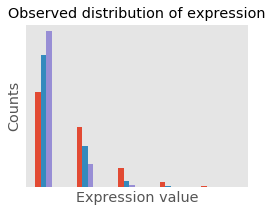

In [23]:
fig = plt.figure(figsize=(4, 3));

plt.hist([
    observed_data_1,
    observed_data_2,
    observed_data_3
])
plt.xticks([])
plt.yticks([])
plt.xlabel('Expression value');
plt.ylabel('Counts');
plt.title('Observed distribution of expression')
plt.savefig('/wynton/group/ye/mincheol/parameter_estimation/figures/three_gene_obs.pdf')

### True vs observed distribution

In [17]:
def generalized_binom_coef(x,y):

    return sp.special.gamma(x+1) / (sp.special.gamma(y+1) * sp.special.gamma(x-y+1))

class toy_rv(stats.rv_discrete):
    
    def _pmf(self, k, n, p):
        
        return generalized_binom_coef(n, k) * p ** (k) * (1-p)**(n-k)
        

In [140]:
latent_data = stats.gamma.rvs(5, 0, 1, size=10000)

In [141]:
observed_data = toy_rv().rvs(n=latent_data, p=0.1)

In [142]:
latent_bincounts = np.bincount(latent_data.astype(int))/10000
observed_bincounts = np.bincount(observed_data.astype(int))/10000

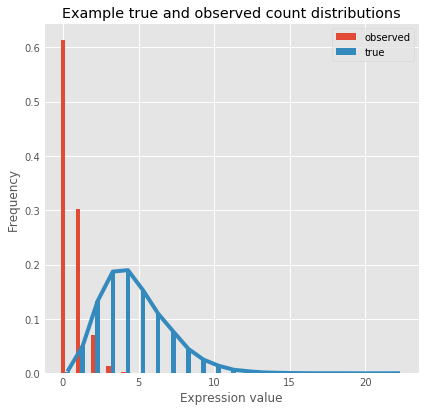

In [160]:
plt.figure(figsize=(6, 6))
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.bar(
    np.arange(observed_bincounts.shape[0]), 
    observed_bincounts, 
    width=0.3, label='observed')
plt.bar(
    np.arange(latent_bincounts.shape[0])+0.3, 
    latent_bincounts, 
    width=0.3, label='true')
plt.plot(
    np.arange(latent_bincounts.shape[0])+0.3, 
    latent_bincounts,
    color=colors[1])
plt.legend()
plt.title('Example true and observed count distributions')
plt.ylabel('Frequency')
plt.xlabel('Expression value')
plt.savefig('toy_true_observed.png')
